# Importing Libraries

In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
%matplotlib inline


In [2]:
from bs4 import BeautifulSoup
import csv
import pandas as pd
import requests
import time 
from time import sleep
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import stat

In [3]:
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [6]:
df_ = pd.read_csv('sports_grocery.csv')
df_.tail()

,Name,Price,Reviews,Weight,Class_info,Rating,Grocery,Sports-Nutrition
3883,"Equal Exchange, Organic Natural Almonds, 8 oz ...",12.06,45.0,227.0,Grocery,4.4,1,0
3884,"Lundberg, Organic Rice Cake Minis, Sea Salt, 5...",5.75,18.0,142.0,Grocery,4.6,1,0
3885,"Nature's Heart, Chickpea Crunch, Smoked Habane...",5.37,14.0,113.0,Grocery,4.5,1,0
3886,"NuNaturals, Organic Sweetener, Stevia and Monk...",11.03,226.0,70.0,Grocery,4.4,1,0
3887,"Rawmio, Chocolate Hazelnut Spread, 6 oz (170 g)",15.45,44.0,170.0,Grocery,4.3,1,0


In [7]:
df_.rename(columns={'Sports-Nutrition':'SportsNutrition'}, inplace =True)

In [8]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3888 non-null   object 
 1   Price            3888 non-null   float64
 2   Reviews          3888 non-null   float64
 3   Weight           3888 non-null   float64
 4   Class_info       3888 non-null   object 
 5   Rating           3888 non-null   float64
 6   Grocery          3888 non-null   int64  
 7   SportsNutrition  3888 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 243.1+ KB


In [9]:
#drop unnecassery column
df3 = df_.drop(['Class_info', 'Grocery', 'Name'],axis=1, errors='ignore')

In [10]:
df3.columns

Index(['Price', 'Reviews', 'Weight', 'Rating', 'SportsNutrition'], dtype='object')

In [11]:
df3.head()

,Price,Reviews,Weight,Rating,SportsNutrition
0,106.25,19775.0,2270.0,4.6,1
1,24.29,4875.0,454.0,4.6,1
2,25.22,5495.0,0.0,4.6,1
3,26.17,9134.0,540.0,4.4,1
4,11.39,24320.0,40.0,4.7,1


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            3888 non-null   float64
 1   Reviews          3888 non-null   float64
 2   Weight           3888 non-null   float64
 3   Rating           3888 non-null   float64
 4   SportsNutrition  3888 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 152.0 KB


In [13]:
df3

,Price,Reviews,Weight,Rating,SportsNutrition
0,106.25,19775.0,2270.0,4.6,1
1,24.29,4875.0,454.0,4.6,1
2,25.22,5495.0,0.0,4.6,1
3,26.17,9134.0,540.0,4.4,1
4,11.39,24320.0,40.0,4.7,1
...,...,...,...,...,...
3883,12.06,45.0,227.0,4.4,0
3884,5.75,18.0,142.0,4.6,0
3885,5.37,14.0,113.0,4.5,0
3886,11.03,226.0,70.0,4.4,0


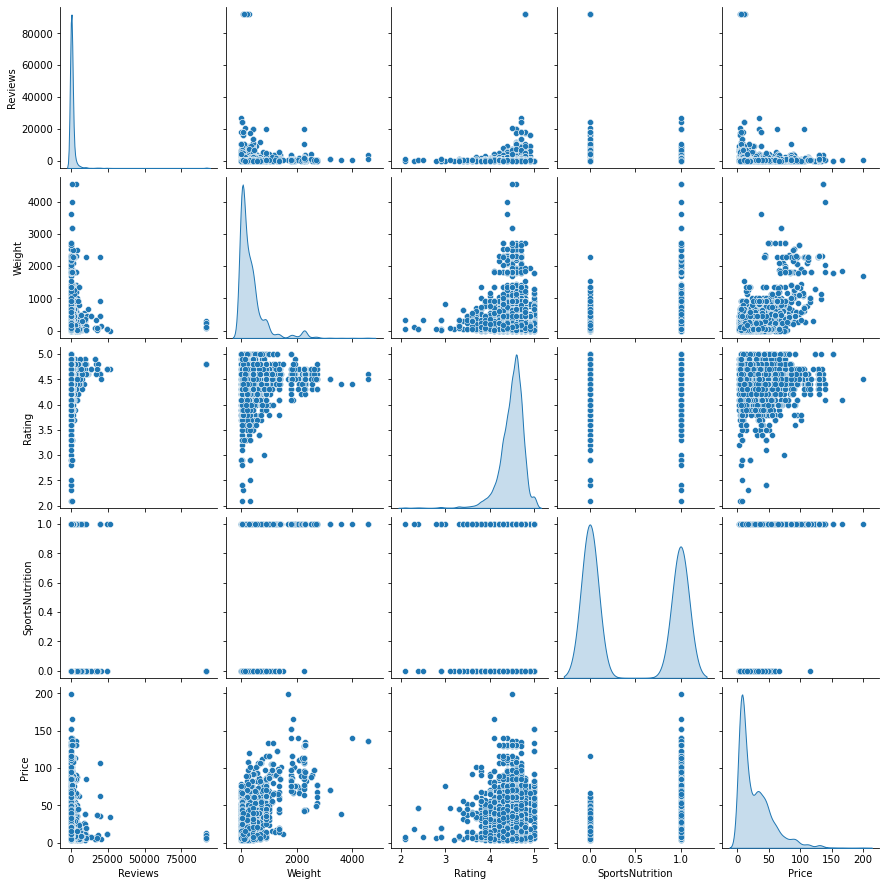

In [14]:
#Visualizing the relationship between target variable and features
subset1=df_[['Reviews', 'Weight', 'Rating','SportsNutrition','Price']]

sns.pairplot(subset1, diag_kind='kde')
plt.show()

In [15]:
corr = df_.corr()
corr

,Price,Reviews,Weight,Rating,Grocery,SportsNutrition
Price,1.000000,-0.075036,0.673578,-0.032750,-0.671632,0.671632
Reviews,-0.075036,1.000000,-0.021409,0.089132,0.090307,-0.090307
Weight,0.673578,-0.021409,1.000000,0.068162,-0.333963,0.333963
Rating,-0.032750,0.089132,0.068162,1.000000,0.057354,-0.057354
Grocery,-0.671632,0.090307,-0.333963,0.057354,1.000000,-1.000000
SportsNutrition,0.671632,-0.090307,0.333963,-0.057354,-1.000000,1.000000


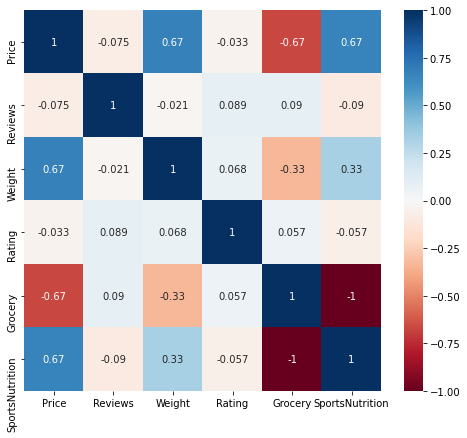

In [16]:
plt.figure(figsize = (8,7))
sns.heatmap(corr, annot = True, cmap="RdBu")
plt.show()

# Splitting the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df3[[ 'Reviews', 'Weight','Rating','SportsNutrition']], df3[['Price']], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Data has",X_train.shape)
print("Validation Data has",X_val.shape)
print("Testing Data has",X_test.shape)

Training Data has (2488, 4)
Validation Data has (622, 4)
Testing Data has (778, 4)


# Linear Regression Model

### Model 1

In [19]:
X, y = df3.drop('Price',axis=1), df_['Price']

In [20]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)

In [21]:
# The SOLUTION is HERE
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=3)

In [22]:
y_test.head()

2786     6.93
293     30.36
1105    76.47
424      7.51
2590     5.37
Name: Price, dtype: float64

In [23]:
X_train.shape

(2488, 4)

In [24]:
X_val.shape

(622, 4)

In [25]:
y_train.shape

(2488,)

In [26]:
y_val.shape

(622,)

In [27]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

In [28]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
lm.score(X_train_scaled, y_train)

0.6829820252162786

In [30]:
# get y-intercept
lm.intercept_

28.25405546623794

In [31]:
print(f'Linear Regression val R^2: {lm.score(X_val_scaled, y_val):.3f}')

Linear Regression val R^2: 0.684


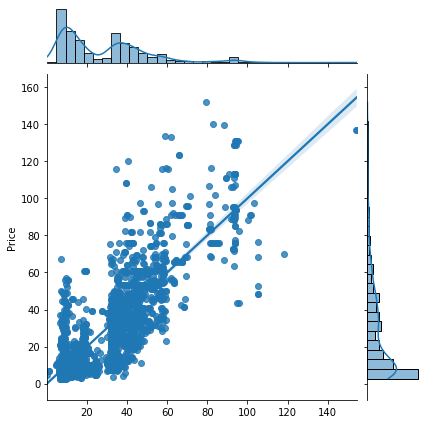

In [32]:
preds = lm.predict(X_train_scaled) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_train, kind='reg')


In [33]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_train,preds)

10.058777083165147

In [34]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_train,preds)

14.494129683492158

In [35]:
def SSE(actuals, preds): #sum squared error
    return np.sum((actuals - preds)**2)

SSE(y_train,preds)

522678.53066133877

In [36]:
def SST(y): #Total sum squared
    return np.sum((y - np.mean(y))**2)

SST(y_train)

1648734.6845803456

In [37]:
def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_train,preds)


0.6829820252162786

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
# cross Vali
lr=LinearRegression()
lr.fit(X_train,y_train)
val = KFold(n_splits = 5)
cv_res = cross_val_score(lr,X_train,y_train,cv = val ,scoring = 'r2')
print('The R^2: ',cv_res.mean())
y_pred=lr.predict(X_val)
score = r2_score(y_val,y_pred)
mse = mean_squared_error(y_pred,y_val)
print('Testing R^2: ',score)
print('Mean Squared Error:' ,mse)

The R^2:  0.6797645495462754
Testing R^2:  0.6844529647472162
Mean Squared Error: 233.05663520055612


## model 2

In [39]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [40]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.684
Ridge Regression val R^2: 0.684
Degree 2 polynomial regression val R^2: 0.711


In [41]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.667


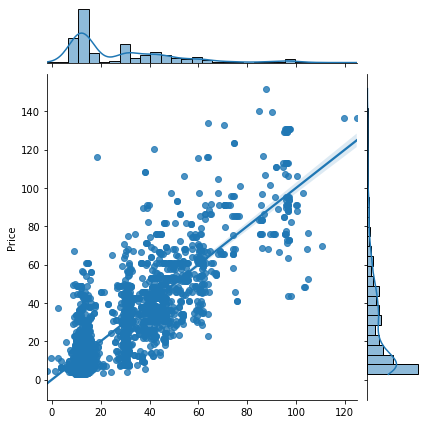

In [42]:
preds = lm_poly.predict(X_train_poly) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_train, kind='reg')


In [43]:
def MAE1(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_train,preds)

9.825329002632607

In [44]:
def RMSE1(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_train,preds)


13.917287688345796

In [45]:
def SSE1(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y_train,preds)

481902.9507412518

In [46]:
def SST1(y):
    return np.sum((y - np.mean(y))**2)

SST(y_train)

1648734.6845803456

In [47]:
def RMSE1(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_train,preds)

13.917287688345796

In [48]:
def R2(actuals, preds):
    return 1 - SSE1(actuals, preds) / SST1(actuals)

R2(y_train,preds)


0.7077134633921338

# Testing

In [49]:
from sklearn.pipeline import make_pipeline

In [50]:
X_train = pd.concat([X_train,X_val])
y_train = pd.concat([y_train,y_val])

In [51]:
est = make_pipeline(PolynomialFeatures(2), LinearRegression())
est.fit(X_train, y_train)


val = KFold(n_splits = 5)
cv_res = cross_val_score(est,X_train,y_train,cv = val ,scoring = 'r2')

print('The R square: ',cv_res.mean())

y_pred = est.predict(X_test)
#score = r2_score(y_train,y_pred)
mse = mean_squared_error(y_pred,y_test)
#print('Testing R^2: ',score)
print('Mean Squared Error: ',mse)

The R square:  0.7033388848338744
Mean Squared Error:  220.38118909180778


In [52]:
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression val R^2: 0.667


In [53]:
len(y_train)

3110

In [54]:
len(y_test)

778

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1676.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:01:01   Log-Likelihood:                -12762.
No. Observations:                3110   AIC:                         2.553e+04
Df Residuals:                    3105   BIC:                         2.556e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.8505      4.413      5.404      0.000      15.197      32.504
Reviews         -9.499e-05   6.04e-05     -1.572      0.116      -0.000    2.35e-05
Weight              0.0265      0.001     47.244      0.000       0.025       0.028
Rating             -3.7957      0.981     -3.871      0.000      -5.718      -1.873
SportsNutrition    26.3155      0.562     46.802      0.000      25.213      27.418
==============================================================================
Omnibus:                      633.511   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2247.676
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       6.665   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

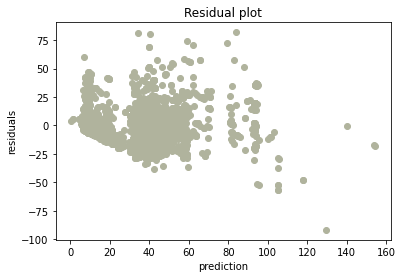

In [56]:
pred = lr.predict(X)
res = y - pred
plt.scatter(pred, res,color = '#b0b39d') # "scatter supposed to have no pattern"
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")
plt.savefig("Residual.png")